# Unveiling the Statistical Patterns: An In-Depth Examination of the COVID-19 Crisis in Canada

In this notebook an analysis in regards to the COVID-19 Pandemic in Canada is discussed. Based on the recent speech (September 23rd, 2020) that Prime Minister, Justin Trudeau, where he acknowledged the fact that the country is already in a second wave of the novel COVID-19, and that the country will not be able to celebrate Thanksgiving (October 12th) as it has been celebrated in previous years.



## Importing Libraries
The libraries used in this notebook are:

In [1]:
!pip install --upgrade matplotlib
!pip install --upgrade seaborn

In [2]:

from urllib.request import urlretrieve
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preparation and Cleaning
For the purposes of this work the data will be retrieved from Our World in Data, which is updated in a daily basis bases on the information reported officially by the governments of each country in the world.



### Our World in Data - COVID-19 Dataset
Our World in Data (OWID) is a scientific online publication that focuses on large global problems such as poverty, disease, hunger, climate change, war, existential risks, and inequality.

https://ourworldindata.org/

To retrieve the updated dataset from their website we will use the following cell:

In [3]:
# OWID COVID19 Dataset URL:
url_owid_covid = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

# Retrive .CSV file from OWID
urlretrieve(url_owid_covid, 'owid-covid-data.csv')
covid_world_df = pd.read_csv('owid-covid-data.csv')

The previous cell downloads a .CSV file defined in the second argument.

After that, we can read it with Pandas using the module .read_cvs(), which reads comma-separated values (csv) files and convert them into a Pandas DataFrame.

The Pandas DataFrame object is one of the core data structures in Pandas for storing and working with tabular data.

The variables used to store Data Frames are usually named with the suffix _df for easy identification.

In [4]:
type(covid_world_df)

pandas.core.frame.DataFrame

In [5]:
covid_world_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315067,ZWE,Africa,Zimbabwe,2023-05-27,264992.0,0.0,9.429,5692.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
315068,ZWE,Africa,Zimbabwe,2023-05-28,265023.0,31.0,12.429,5693.0,1.0,0.286,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
315069,ZWE,Africa,Zimbabwe,2023-05-29,265030.0,7.0,13.000,5695.0,2.0,0.571,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
315070,ZWE,Africa,Zimbabwe,2023-05-30,265030.0,0.0,13.000,5695.0,0.0,0.571,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


Just by observing at the printed data frame it is easy to observe the following:


The file provides worldwide data from each country

The data is categorized by continent and country

The data is provided in a daily basis

There are several metrics inside the dataset.

The dataset contains more than 46 thousand entries

It is important to keep in mind that this data is officially reported data, which means that the actual number of cases, deaths and more metrics presented in here may be higher, since not all the cases are diagnosed as COVID-19 cases.

One can see the basic information of the data frame using the .info() method.

In [6]:
covid_world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315072 entries, 0 to 315071
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    315072 non-null  object 
 1   continent                                   300078 non-null  object 
 2   location                                    315072 non-null  object 
 3   date                                        315072 non-null  object 
 4   total_cases                                 278750 non-null  float64
 5   new_cases                                   306117 non-null  float64
 6   new_cases_smoothed                          304853 non-null  float64
 7   total_deaths                                257954 non-null  float64
 8   new_deaths                                  306200 non-null  float64
 9   new_deaths_smoothed                         304970 non-null  float64
 

From the information above, we can observe that the dataset has 41 columns with different type of data focusing on:

Cases (Positive diagnosed cases)
Deaths (Deaths related to COVID-19)
Tests (Testing conducted)
Also, it seems that the numeric columns have a specific data type, float64, and the non-numeric data is object type.

## Creating Data Frames
Indeed, the data provided by the OWID COVID-19 dataset is very interesting and it would be nice to get in deep to analyze each country and the effects of how this numbers have affected the world, but for the purposes of this work we will focus in Canada.

To filter the data related to this country, we will take advantage that the dataset contains the location column.

Let us filter the data from Canada, as follows:

In [7]:
covid_world_df[covid_world_df['location'] == 'Canada']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
47350,CAN,North America,Canada,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
47351,CAN,North America,Canada,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
47352,CAN,North America,Canada,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,-195.1,-3.04,-3.04,-5.149292
47353,CAN,North America,Canada,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
47354,CAN,North America,Canada,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48590,CAN,North America,Canada,2023-05-27,4673731.0,0.0,537.571,52391.0,0.0,7.714,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
48591,CAN,North America,Canada,2023-05-28,4676878.0,3147.0,449.571,52425.0,34.0,4.857,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
48592,CAN,North America,Canada,2023-05-29,4676878.0,NaN,NaN,52425.0,NaN,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
48593,CAN,North America,Canada,2023-05-30,4676878.0,NaN,NaN,52425.0,NaN,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN


Notice that compared to the whole covid_world_df, this sample is just from the location or country Canada.

We will place the data from the country into its own data frame, using the same syntaxis to filter the dataset and assigning it to a new variable:

In [8]:
# Create a data frame for the country
canada_df = covid_world_df[covid_world_df['location'] == 'Canada']
canada_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
47350,CAN,North America,Canada,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
47351,CAN,North America,Canada,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
47352,CAN,North America,Canada,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,-195.1,-3.04,-3.04,-5.149292
47353,CAN,North America,Canada,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
47354,CAN,North America,Canada,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48590,CAN,North America,Canada,2023-05-27,4673731.0,0.0,537.571,52391.0,0.0,7.714,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
48591,CAN,North America,Canada,2023-05-28,4676878.0,3147.0,449.571,52425.0,34.0,4.857,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
48592,CAN,North America,Canada,2023-05-29,4676878.0,NaN,NaN,52425.0,NaN,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
48593,CAN,North America,Canada,2023-05-30,4676878.0,NaN,NaN,52425.0,NaN,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN


In [9]:
# Save original data per country
canada_df.to_csv('canada_covid_data.csv', index=False)

## Cleaning the DataFrame
Before starting to work with the data frame, it is important to verify that all the information was input correctly and in a reasonable manner.

We will read the new CSV files created in the previous sections. The data frames created from the OWID dataset are in a continuous indexing manner, meanwhile the ones that we just created are not using the original indexing, which will restart the index of each data frame and we will have no need to work with high values.

In [10]:
# Read CVS files
canada_df = pd.read_csv('canada_covid_data.csv')

Let us verify that each of the data frames were imported correctly by printing the first and last 5 rows.

To print the first 5 rows of a data frame, we can use the .head() method, for example:

In [11]:
canada_df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,CAN,North America,Canada,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
1,CAN,North America,Canada,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
2,CAN,North America,Canada,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,-195.1,-3.04,-3.04,-5.149292
3,CAN,North America,Canada,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
4,CAN,North America,Canada,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
5,CAN,North America,Canada,2020-01-08,NaN,0.0,0.0,NaN,0.0,0.0,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
6,CAN,North America,Canada,2020-01-09,NaN,0.0,0.0,NaN,0.0,0.0,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
7,CAN,North America,Canada,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
8,CAN,North America,Canada,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
9,CAN,North America,Canada,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,16.6,NaN,2.5,82.43,0.929,38454328.0,-429.2,-3.34,-3.63,-11.327915


In [12]:
canada_df.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1235,CAN,North America,Canada,2023-05-22,4673731.0,0.0,537.571,52391.0,0.0,7.714,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
1236,CAN,North America,Canada,2023-05-23,4673731.0,0.0,537.571,52391.0,0.0,7.714,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
1237,CAN,North America,Canada,2023-05-24,4673731.0,0.0,537.571,52391.0,0.0,7.714,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
1238,CAN,North America,Canada,2023-05-25,4673731.0,0.0,537.571,52391.0,0.0,7.714,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
1239,CAN,North America,Canada,2023-05-26,4673731.0,0.0,537.571,52391.0,0.0,7.714,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
1240,CAN,North America,Canada,2023-05-27,4673731.0,0.0,537.571,52391.0,0.0,7.714,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
1241,CAN,North America,Canada,2023-05-28,4676878.0,3147.0,449.571,52425.0,34.0,4.857,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
1242,CAN,North America,Canada,2023-05-29,4676878.0,NaN,NaN,52425.0,NaN,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
1243,CAN,North America,Canada,2023-05-30,4676878.0,NaN,NaN,52425.0,NaN,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN
1244,CAN,North America,Canada,2023-05-31,4676878.0,NaN,NaN,52425.0,NaN,NaN,...,16.6,NaN,2.5,82.43,0.929,38454328.0,NaN,NaN,NaN,NaN


Now that we verified that the data was imported correctly, we can start checking the information inside.

Since these data frames include a lot of data and it is hard to read it all at once, we will create new data frames with certain columns only.

To list all the columns included in the data frames we can use the .columns method:

In [13]:
canada_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

From the information displayed above we will take the following columns:

date 

new_cases 

new_deaths 

new_tests 

total_cases 

total_deaths 

total_tests 


You can easily create the new data frames as follows:

In [14]:
covid_canada_df = canada_df[['date', 'new_cases', 'new_deaths', 'new_tests', 'total_cases', 'total_deaths', 'total_tests']]

In [15]:
# Split the column date into, month, day, year, weekday
covid_canada_df['month'] = pd.DatetimeIndex(covid_canada_df.date).month
covid_canada_df['day'] = pd.DatetimeIndex(covid_canada_df.date).day
covid_canada_df['year'] = pd.DatetimeIndex(covid_canada_df.date).year
covid_canada_df

/tmp/ipykernel_147/1356834264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_canada_df['month'] = pd.DatetimeIndex(covid_canada_df.date).month
/tmp/ipykernel_147/1356834264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_canada_df['day'] = pd.DatetimeIndex(covid_canada_df.date).day
/tmp/ipykernel_147/1356834264.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year
0,2020-01-03,0.0,0.0,NaN,NaN,NaN,NaN,1,3,2020
1,2020-01-04,0.0,0.0,NaN,NaN,NaN,NaN,1,4,2020
2,2020-01-05,0.0,0.0,NaN,NaN,NaN,NaN,1,5,2020
3,2020-01-06,0.0,0.0,NaN,NaN,NaN,NaN,1,6,2020
4,2020-01-07,0.0,0.0,NaN,NaN,NaN,NaN,1,7,2020
...,...,...,...,...,...,...,...,...,...,...
1240,2023-05-27,0.0,0.0,NaN,4673731.0,52391.0,NaN,5,27,2023
1241,2023-05-28,3147.0,34.0,NaN,4676878.0,52425.0,NaN,5,28,2023
1242,2023-05-29,NaN,NaN,NaN,4676878.0,52425.0,NaN,5,29,2023
1243,2023-05-30,NaN,NaN,NaN,4676878.0,52425.0,NaN,5,30,2023


As we can see, at the very right of the data frame we have 4 new columns, month, day, and year.

Now that we have the datasets separately we can perform a quick statistical by using the .describe() method which returns information such as mean, standard deviation, minimum/maximum values and number of non-empty values.

In [16]:
covid_canada_df.describe()

,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year
count,1241.000000,1241.000000,825.00000,1.222000e+03,1178.000000,8.340000e+02,1245.000000,1245.000000,1245.000000
mean,3768.639807,42.512490,75364.24000,2.150680e+06,28937.996604,2.893963e+07,6.105221,15.742169,2021.243373
std,6410.722515,62.176777,46250.78457,1.747899e+06,15469.582066,2.097446e+07,3.463779,8.787425,1.006114
min,0.000000,0.000000,18.00000,1.000000e+00,1.000000,0.000000e+00,1.000000,1.000000,2020.000000
25%,0.000000,0.000000,42669.00000,3.436995e+05,15033.250000,7.468067e+06,3.000000,8.000000,2020.000000
50%,1512.000000,18.000000,72750.00000,1.605926e+06,28247.000000,2.957860e+07,6.000000,16.000000,2021.000000
75%,4729.000000,54.000000,103462.00000,4.056420e+06,42419.000000,4.707747e+07,9.000000,23.000000,2022.000000
max,49148.000000,382.000000,601278.00000,4.676878e+06,52425.000000,6.217763e+07,12.000000,31.000000,2023.000000


Since this data is directly extracted from the governments, it is possible that some of those NaN values might be due to days were the country had a holiday or for another reason, which might be exclusive from each country.

## Exploratory Analysis and Visualization

In order to understand better the information in this dataset, it would be a good idea to set it as a matter of questions and answers:

Let us start by setting up some parameters for the plots that we are going to create.



In [17]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Q1: When was the first confirmed case reported in Canada?**


To answer this question we can use the .neor Not Equal to a certain value, in this case 0, and it can be applied to the new_cases series.

In [18]:
first_confirmed_case = covid_canada_df.date.loc[covid_canada_df['new_cases'].ne(0).idxmax()]

In [19]:
print("The first confirmed case in Canada was reported on {}.".format(str(first_confirmed_case)))

The first confirmed case in Canada was reported on 2020-01-26.


**Q2: How many cases were reported by the time the lock down was in implemented (March 16, 2020)?**

In [20]:
# Date when the locked down was implemented
locked_down_date = '2020-03-16'
total_cases_locked_down_date = covid_canada_df.total_cases.loc[covid_canada_df.loc[covid_canada_df.date == locked_down_date].index.values.astype(int)[0]]


In [21]:
print("The total number of confirmed cases by {} was {}.".format(locked_down_date, int(total_cases_locked_down_date)))

The total number of confirmed cases by 2020-03-16 was 193.


So, when the locked down was implemented in Canada the number of confirmed cases was 193.

**Q3: How many deaths were reported by the time the locked down was implemented?**

In [22]:
total_deaths_locked_down_date = covid_canada_df.total_deaths.loc[covid_canada_df.loc[covid_canada_df.date == locked_down_date].index.values.astype(int)[0]]


In [23]:
print("The total number of deaths by {} was {}.".format(locked_down_date, int(total_deaths_locked_down_date)))

The total number of deaths by 2020-03-16 was 1.


It is very interesting, to see that by the time Canada implemented a full locked down, the country only had 1 death related to COVID-19.

This can lead us to the next question:

**Q4: When was the first death related to COVID-19 reported?**

In [24]:
first_death = covid_canada_df.date.loc[covid_canada_df['new_deaths'].ne(0).idxmax()]

In [25]:
print("The first death related to COVID-19 in Canada was reported on {}.".format(str(first_death)))

The first death related to COVID-19 in Canada was reported on 2020-03-10.


The first reported death related to COVID-19 was on March 10th, and accordingly to CBC News:

British Columbian health officials confirmed Monday (March 9th) the patient, a man in his 80s with underlying health conditions, died Sunday night after becoming infected with the illness at the Lynn Valley Care Centre in North Vancouver.

So far what we have found is that the pandemic forced Canada to implement a national locked down with:

1 death related to COVID-19
304 confirmed cases
Let us analyze what are the latest entries of the data set:

**Q5: How did the number of daily new cases and new deaths evolved in Canada?** 

It will be easier to see this information ploted

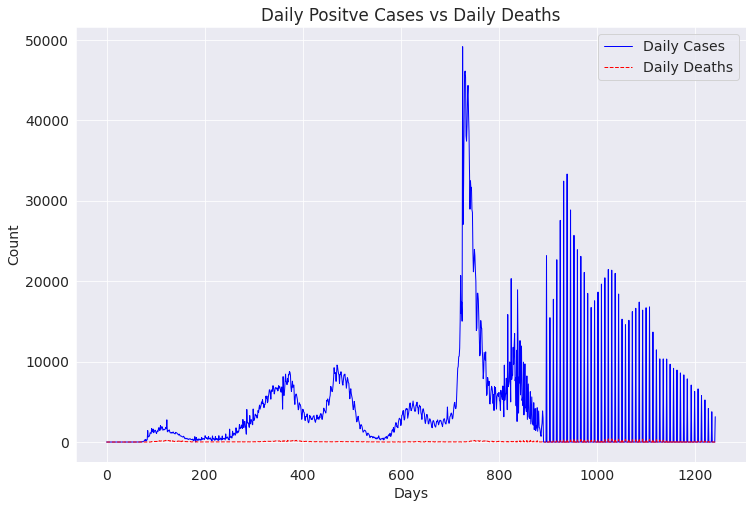

In [26]:
plt.plot(covid_canada_df.new_cases, 'b-', linewidth=1, markersize=5, markeredgewidth=2, markeredgecolor='navy')
plt.plot(covid_canada_df.new_deaths, 'r--', linewidth=1, markersize=5,)
plt.title('Daily Positve Cases vs Daily Deaths')
plt.legend(['Daily Cases', 'Daily Deaths'])
plt.xlabel('Days'); plt.ylabel('Count');

It seems that at the early stages of the locked down  the new deaths reported were considerably low, compared to the number of cases. But a few days later a big spike in cases arise.

Also, it seems that today (September 30th) Canada is getting as much new daily cases as the country was reporting during the locked down, but the number of deaths is very close to 0.

**Q6: Which days were the ones that reported the highest number of cases?**

To answer this we need to consider the average of daily cases.

In [27]:
covid_canada_df.new_cases.describe()

count     1241.000000
mean      3768.639807
std       6410.722515
min          0.000000
25%          0.000000
50%       1512.000000
75%       4729.000000
max      49148.000000
Name: new_cases, dtype: float64

We will consider 1400 cases as threshold, and create a new data frame to analyze the data of these days.

In [28]:
high_positive_cases_df = covid_canada_df[covid_canada_df.new_cases > 5000]
high_positive_cases_df

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year
318,2020-11-16,5267.0,62.0,102551.0,292585.0,10833.0,12773233.0,11,16,2020
325,2020-11-23,5705.0,72.0,113197.0,326424.0,11343.0,13486536.0,11,23,2020
326,2020-11-24,5418.0,47.0,96924.0,331842.0,11390.0,13583460.0,11,24,2020
327,2020-11-25,5713.0,63.0,81287.0,337555.0,11453.0,13664747.0,11,25,2020
329,2020-11-27,5022.0,92.0,118072.0,347466.0,11641.0,13883888.0,11,27,2020
...,...,...,...,...,...,...,...,...,...,...
1192,2023-04-09,7085.0,147.0,NaN,4641887.0,51714.0,NaN,4,9,2023
1199,2023-04-16,6296.0,144.0,NaN,4648183.0,51858.0,NaN,4,16,2023
1206,2023-04-23,6606.0,117.0,NaN,4654789.0,51975.0,NaN,4,23,2023
1213,2023-04-30,5773.0,143.0,NaN,4660562.0,52118.0,NaN,4,30,2023


In [29]:
high_positive_cases_df.shape

(294, 10)

As result, we have that there much more days with over 1300 new confirmed cases. Now let us sort these information based on the highest confirmed cases date.

In [30]:
high_positive_cases_df.sort_values('new_cases', ascending=False)

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year
726,2021-12-29,49148.0,35.0,130829.0,2043297.0,29896.0,52408105.0,12,29,2021
731,2022-01-03,46118.0,19.0,14510.0,2234427.0,30043.0,52788460.0,1,3,2022
730,2022-01-02,45837.0,39.0,15657.0,2188309.0,30024.0,52773950.0,1,2,2022
732,2022-01-04,45329.0,28.0,601278.0,2279756.0,30071.0,53389738.0,1,4,2022
737,2022-01-09,44331.0,84.0,17880.0,2482142.0,30363.0,53944481.0,1,9,2022
...,...,...,...,...,...,...,...,...,...,...
625,2021-09-19,5094.0,45.0,102394.0,1569186.0,27096.0,42190807.0,9,19,2021
859,2022-05-11,5085.0,23.0,54729.0,3802946.0,39941.0,61391416.0,5,11,2022
505,2021-05-22,5052.0,45.0,104070.0,1347439.0,24871.0,34083113.0,5,22,2021
802,2022-03-15,5023.0,28.0,40152.0,3366698.0,36928.0,58845250.0,3,15,2022


And now let us plot this information:

In [37]:
max_value = high_positive_cases_df['new_cases'].max()
row_with_max_value = high_positive_cases_df.loc[high_positive_cases_df['new_cases'] == max_value]
row_with_max_value

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year
726,2021-12-29,49148.0,35.0,130829.0,2043297.0,29896.0,52408105.0,12,29,2021


In [35]:
plt.figure(figsize=(100 ,100))# Increase the figure size as per your preference

sns.barplot(x=high_positive_cases_df.new_cases, y=high_positive_cases_df.date)
plt.title('Days with the Highest Positive Cases', fontsize=120) # Increase the title font size
plt.xlabel('Number of Daily Positive Cases', fontsize=120) # Increase the x-axis label font size
plt.ylabel('Date', fontsize=120)  # Increase the y-axis label font size

plt.xticks(fontsize=40)# Increase the x-axis tick font size
plt.yticks(fontsize=40)# Inrease the y-axis tick font size
plt.tight_layout()

plt.show()

The day with the most reported cases was December 29th, with over 49148 cases.

**Q7: Which days were the ones that reported over 150 deaths?**

In [40]:
high_deaths_days_df = covid_canada_df[covid_canada_df.new_deaths > 200]
high_deaths_days_df

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year
121,2020-05-03,1825.0,206.0,32322.0,55050.0,3382.0,789350.0,5,3,2020
151,2020-06-02,757.0,222.0,31463.0,90936.0,7275.0,1725035.0,6,2,2020
369,2021-01-06,7911.0,207.0,83472.0,611424.0,15962.0,18597612.0,1,6,2021
372,2021-01-09,8340.0,209.0,146263.0,635583.0,16463.0,18998073.0,1,9,2021
387,2021-01-24,5957.0,206.0,129020.0,737407.0,18697.0,20817447.0,1,24,2021
750,2022-01-22,23949.0,205.0,59867.0,2868860.0,31844.0,55770366.0,1,22,2022
756,2022-01-28,18489.0,223.0,87945.0,2979832.0,32793.0,56325678.0,1,28,2022
864,2022-05-16,6264.0,215.0,40007.0,3825522.0,40432.0,61538265.0,5,16,2022
932,2022-07-23,32435.0,242.0,NaN,4031431.0,41865.0,NaN,7,23,2022
939,2022-07-30,33318.0,291.0,NaN,4064749.0,42156.0,NaN,7,30,2022


Text(0, 0.5, 'Date')

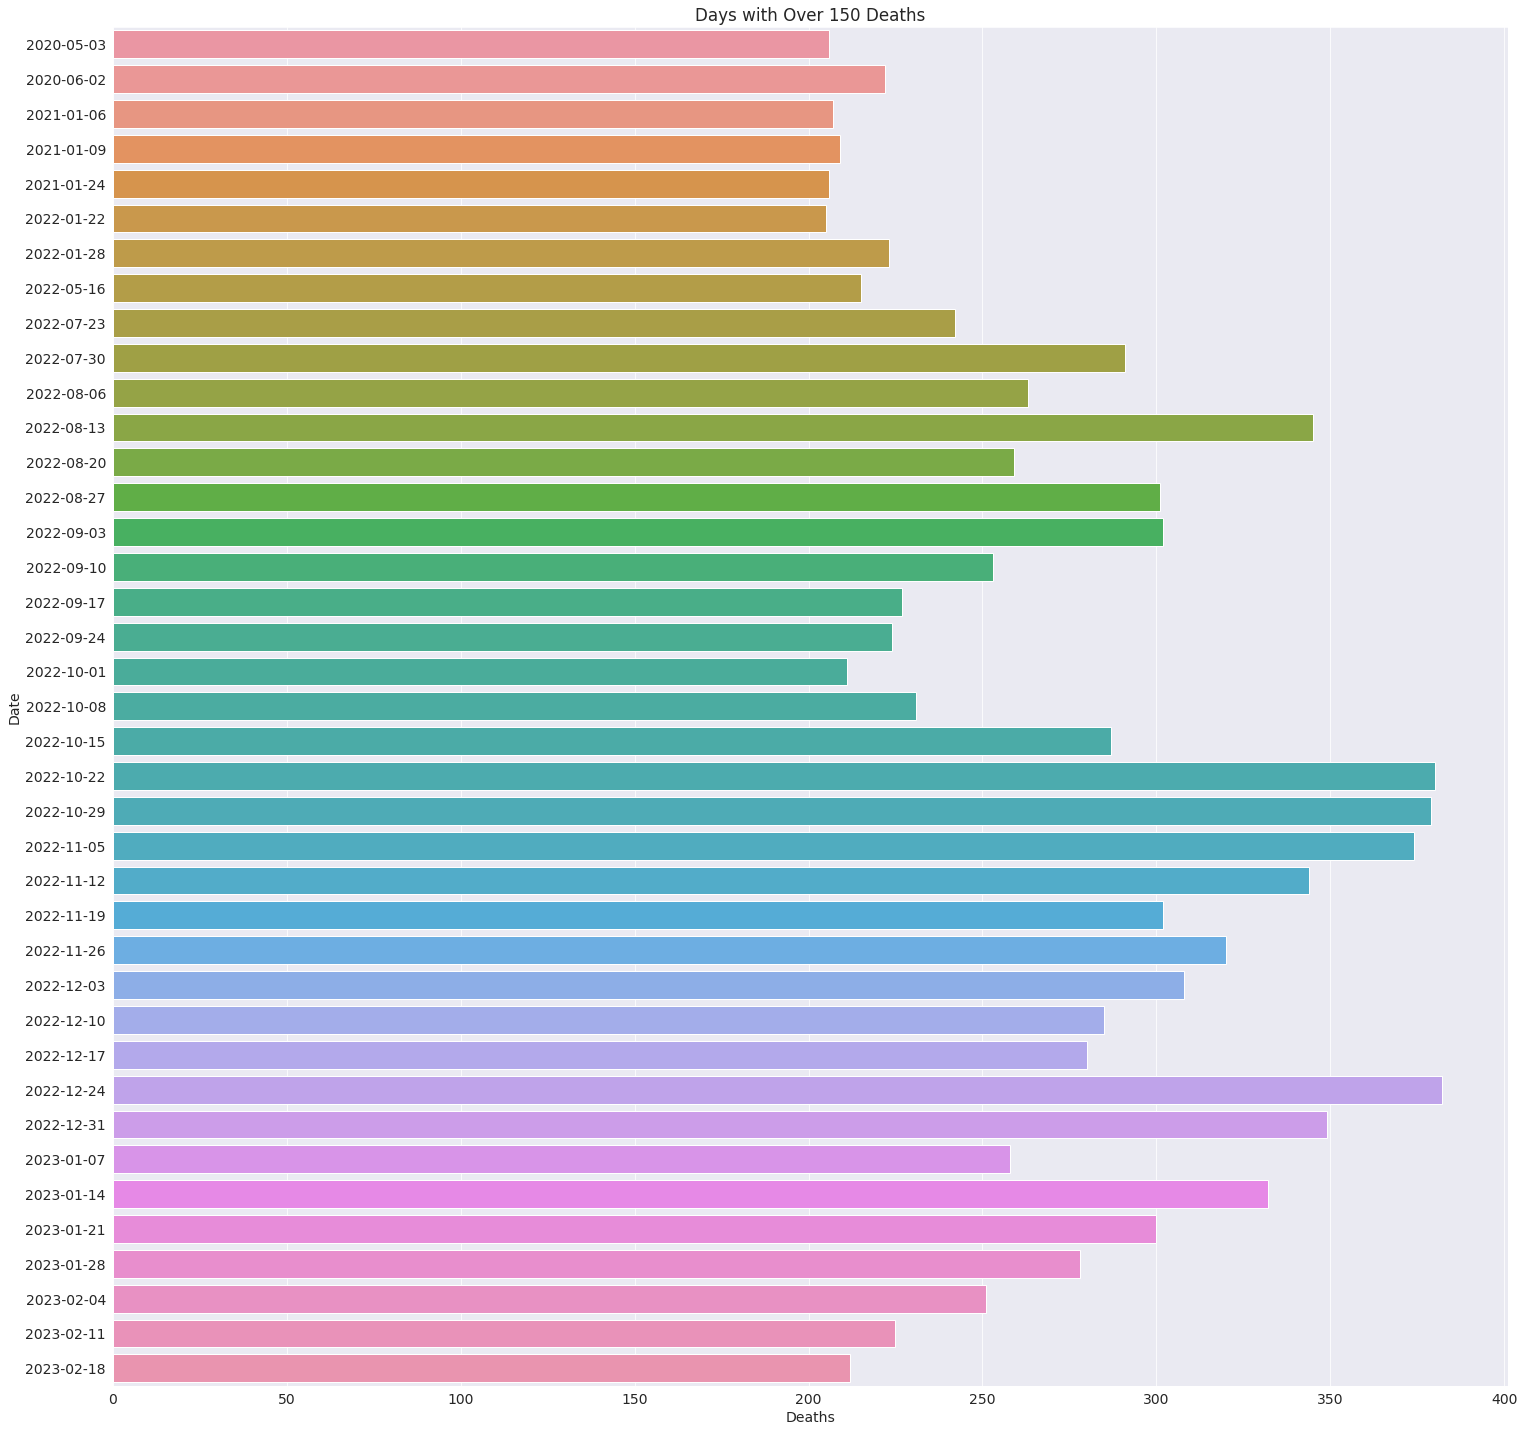

In [41]:
plt.figure(figsize=(25,25))
sns.barplot(x=high_deaths_days_df.new_deaths, y=high_deaths_days_df.date)
plt.title('Days with Over 150 Deaths')
plt.xlabel('Deaths')
plt.ylabel('Date')


It turned out that December 24th was the day with the highest deaths reported, with 382 deaths.

**Q8: How many positive cases did Canada had per month?**

To answer this, it will be necessary to group the information by months instead that per days. To do so, we will use the .groupby() method from Pandas.

In [42]:
covid_canada_month_df = covid_canada_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_canada_month_df

,new_cases,new_deaths,new_tests
month,,,
1,1192986.0,8836.0,7553049.0
2,383099.0,5780.0,4502382.0
3,339100.0,3142.0,4602416.0
4,578785.0,6288.0,5824396.0
5,357028.0,7717.0,5341940.0
6,113688.0,2632.0,3386950.0
7,161316.0,1714.0,3264267.0
8,177755.0,1685.0,3759236.0
9,223814.0,2016.0,5092440.0


Text(0, 0.5, 'Number of Cases')

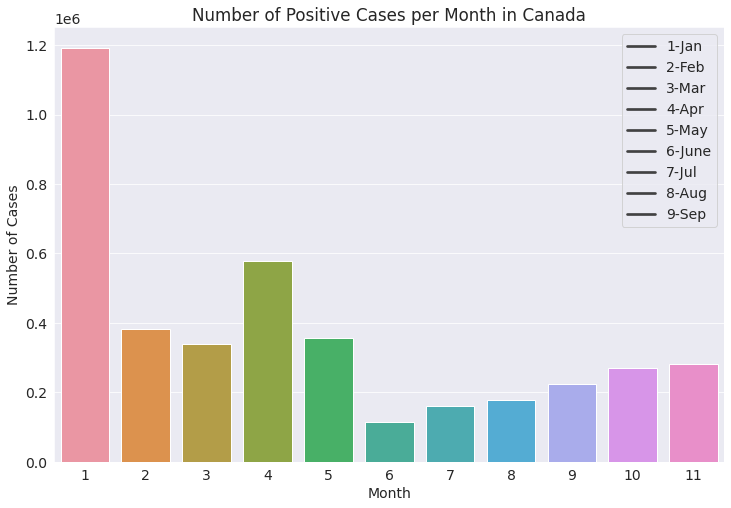

In [43]:
sns.barplot(x=covid_canada_month_df.index.drop(12), y=covid_canada_month_df.new_cases.drop(index=12))
plt.title('Number of Positive Cases per Month in Canada')
plt.legend(['1-Jan', '2-Feb', '3-Mar', '4-Apr', '5-May', '6-June', '7-Jul', '8-Aug', '9-Sep'])
plt.xlabel('Month')
plt.ylabel('Number of Cases')


With this is easy to observe that January was the month with the most positive cases so far, followed by april

**Q9: Which month is the one with the most number of deaths?**

Text(0, 0.5, 'Deaths')

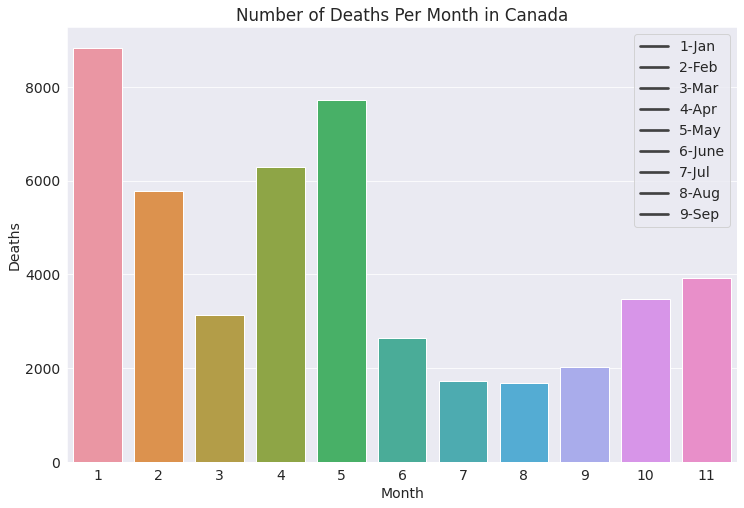

In [44]:
sns.barplot(x=covid_canada_month_df.index.drop(12), y=covid_canada_month_df.new_deaths.drop(index=12))
plt.title('Number of Deaths Per Month in Canada')
plt.legend(['1-Jan', '2-Feb', '3-Mar', '4-Apr', '5-May', '6-June', '7-Jul', '8-Aug', '9-Sep'])
plt.xlabel('Month')
plt.ylabel('Deaths')


January was the month with the most deaths in Canada

**Q10: How many tests have been performed by month?**

Text(0, 0.5, 'Tests')

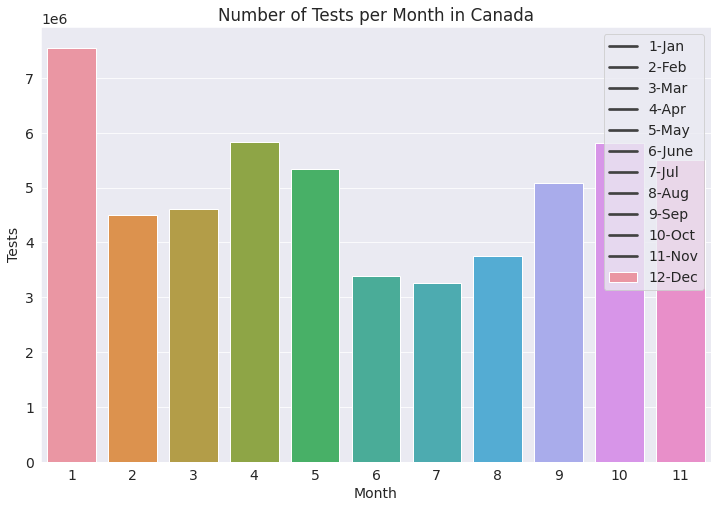

In [45]:
sns.barplot(x=covid_canada_month_df.index.drop(12), y=covid_canada_month_df.new_tests.drop(index=12))
plt.title('Number of Tests per Month in Canada')
plt.legend(['1-Jan', '2-Feb', '3-Mar', '4-Apr', '5-May', '6-June', '7-Jul', '8-Aug', '9-Sep', '10-Oct', '11-Nov', '12-Dec'])
plt.xlabel('Month')
plt.ylabel('Tests')



January is the month with the greatest number of tests performed so far. Also, we can observe that the number of cases were increasing in the matter of thousands since the locked down was implemented

That can lead us to the following question.

**Q11: What is the positive case and death rate per month?**


For that we will have to create 2 new columns in the monthly data frame which will be called death_rate and test_positive_rate.

In [48]:
covid_canada_month_df['death_rate'] = covid_canada_month_df.new_deaths / covid_canada_month_df.new_tests
covid_canada_month_df['test_positive_rate'] = covid_canada_month_df.new_cases / covid_canada_month_df.new_tests
covid_canada_month_df


,new_cases,new_deaths,new_tests,death_rate,test_positive_rate
month,,,,,
1,1192986.0,8836.0,7553049.0,0.001170,0.157948
2,383099.0,5780.0,4502382.0,0.001284,0.085088
3,339100.0,3142.0,4602416.0,0.000683,0.073679
4,578785.0,6288.0,5824396.0,0.001080,0.099373
5,357028.0,7717.0,5341940.0,0.001445,0.066835
6,113688.0,2632.0,3386950.0,0.000777,0.033566
7,161316.0,1714.0,3264267.0,0.000525,0.049419
8,177755.0,1685.0,3759236.0,0.000448,0.047285
9,223814.0,2016.0,5092440.0,0.000396,0.043950


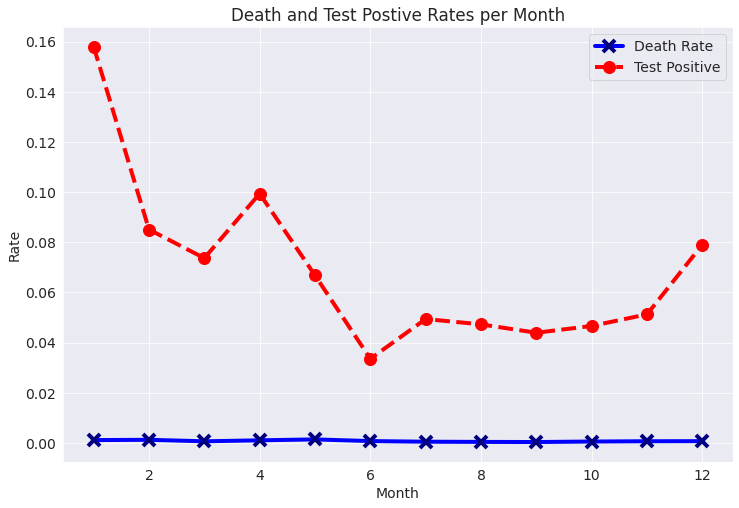

In [49]:
plt.plot(covid_canada_month_df.index, covid_canada_month_df.death_rate, 'b-x', linewidth=4, markersize=12, markeredgewidth=4, markeredgecolor='navy')
plt.plot(covid_canada_month_df.index, covid_canada_month_df.test_positive_rate, 'r--o', linewidth=4, markersize=12,)
plt.title('Death and Test Postive Rates per Month')
plt.legend(['Death Rate', 'Test Positive'])
plt.xlabel('Month'); plt.ylabel('Rate');

**Q12: What is tha porcentage of the population that have tested positive in the country?**

To answer this question let us include the population of the country in the covid_canada_df data frame. Also, we will create a pie chart to see the whole picture.

In [50]:
covid_canada_df['population'] = canada_df.population
covid_canada_df

/tmp/ipykernel_77/1509737410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_canada_df['population'] = canada_df.population


,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year,population
0,2020-01-03,0.0,0.0,NaN,NaN,NaN,NaN,1,3,2020,38454328.0
1,2020-01-04,0.0,0.0,NaN,NaN,NaN,NaN,1,4,2020,38454328.0
2,2020-01-05,0.0,0.0,NaN,NaN,NaN,NaN,1,5,2020,38454328.0
3,2020-01-06,0.0,0.0,NaN,NaN,NaN,NaN,1,6,2020,38454328.0
4,2020-01-07,0.0,0.0,NaN,NaN,NaN,NaN,1,7,2020,38454328.0
...,...,...,...,...,...,...,...,...,...,...,...
1240,2023-05-27,0.0,0.0,NaN,4673731.0,52391.0,NaN,5,27,2023,38454328.0
1241,2023-05-28,3147.0,34.0,NaN,4676878.0,52425.0,NaN,5,28,2023,38454328.0
1242,2023-05-29,NaN,NaN,NaN,4676878.0,52425.0,NaN,5,29,2023,38454328.0
1243,2023-05-30,NaN,NaN,NaN,4676878.0,52425.0,NaN,5,30,2023,38454328.0


Now, we extract the following information:

In [51]:
population = covid_canada_df.population[0]
total_cases = covid_canada_df.total_cases[covid_canada_df.total_cases.last_valid_index()]
total_deaths = covid_canada_df.total_deaths[covid_canada_df.total_deaths.last_valid_index()]
total_tests = covid_canada_df.total_tests[covid_canada_df.total_tests.last_valid_index()]
total_non_tested = population - total_tests

And finally, it is just a matter to plot the inforamtion as follows:

Text(0.5, 1.0, 'Population in Canada per Tests, Cases, Deaths')

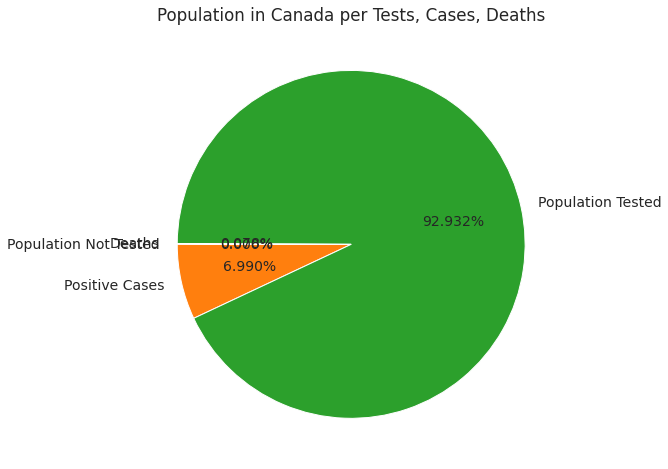

In [53]:
# Create a list of values for each slice
sizes = [total_non_tested, total_cases, total_tests, total_deaths]

# Replace any negative values with zero
sizes = [max(0, val) for val in sizes]

# Plot the pie chart
plt.pie(sizes, labels=['Population Not Tested', 'Positive Cases', 'Population Tested', 'Deaths'],
        autopct='%1.3f%%', startangle=180, counterclock=True)
plt.title('Population in Canada per Tests, Cases, Deaths')



~92.932% of the population has been tested

~6.990% of the population has been tested positive

~0.076% of the population has die

~7.068% of the population has not been tested yet (simply subtract the tested population by 100  )

### Saving the Dataframes as CSV Files

In [47]:
covid_canada_df.to_csv('canada_covid_slim_data.csv', index=False)
covid_canada_month_df.to_csv('canada_covid_monthly_data.csv', index=False)

### Inferences and Conlusions

In this notebook an analysis about how the COVID-19 pandemic has impacted Canada was presented, where the findings about the data are listed as follows:

1 Canada implemented a total lock down on March 16th, 2020 with only 193 confirmed cases and 1 registered death.

2 The first reported death related to COVID-19 was registered a few days before the Canadian government implemented the lock down.

3 May (nearly 600000), June (350000+), and October (200000+) have been the months with the most cases reported

Text(0, 0.5, 'Number of Cases')

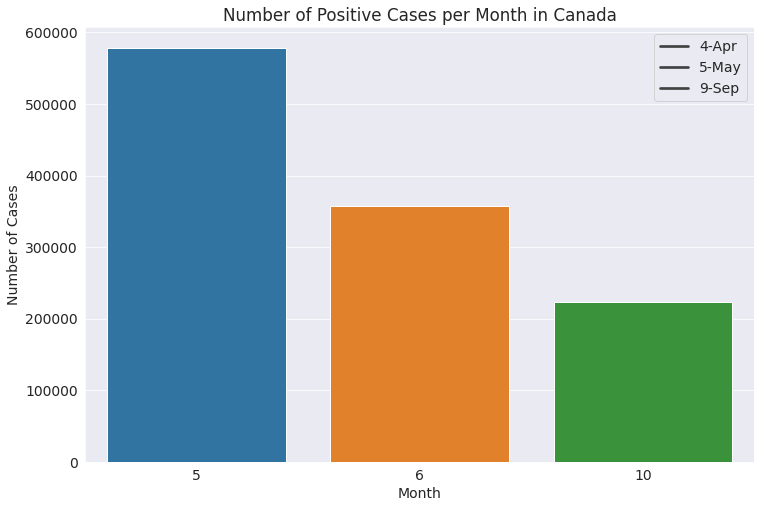

In [48]:
sns.barplot(x=[covid_canada_month_df.index[4], covid_canada_month_df.index[5], covid_canada_month_df.index[9]], 
            y=[covid_canada_month_df.new_cases[4], covid_canada_month_df.new_cases[5], covid_canada_month_df.new_cases[9]])
plt.title('Number of Positive Cases per Month in Canada')
plt.legend(['4-Apr', '5-May', '9-Sep'])
plt.xlabel('Month')
plt.ylabel('Number of Cases')


4 January was the month with the highest number of deaths related to COVID-19, with more than 8000

5 Due to the relaxation on the preventive measures implemented during the lock down, the number of daily cases reported in the country have been increasing at a fast pace, and even matching the numbers reported at the beginning of the pandemic

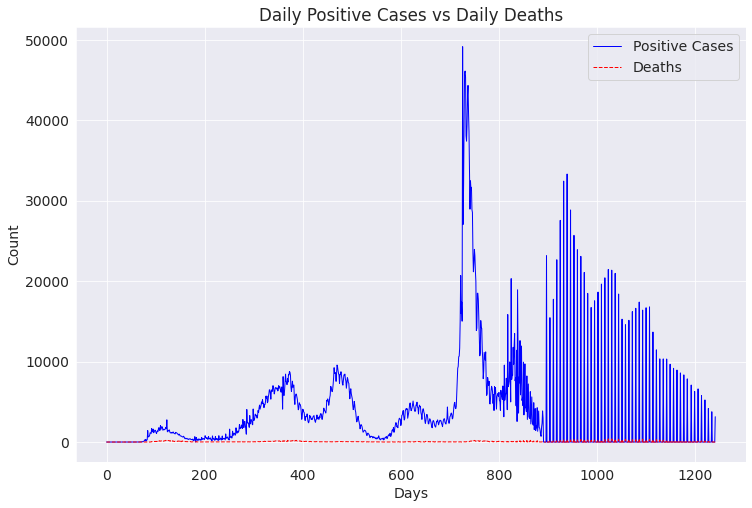

In [49]:
plt.plot(covid_canada_df.new_cases, 'b-', linewidth=1, markersize=5, markeredgewidth=2, markeredgecolor='navy')
plt.plot(covid_canada_df.new_deaths, 'r--', linewidth=1, markersize=5,)
plt.title('Daily Positive Cases vs Daily Deaths')
plt.legend(['Positive Cases', 'Deaths'])
plt.xlabel('Days'); plt.ylabel('Count');

6 In other hand the number of deaths have been stabilized.

7 In September, the number of daily cases was very high, but the number of deaths was kept low.

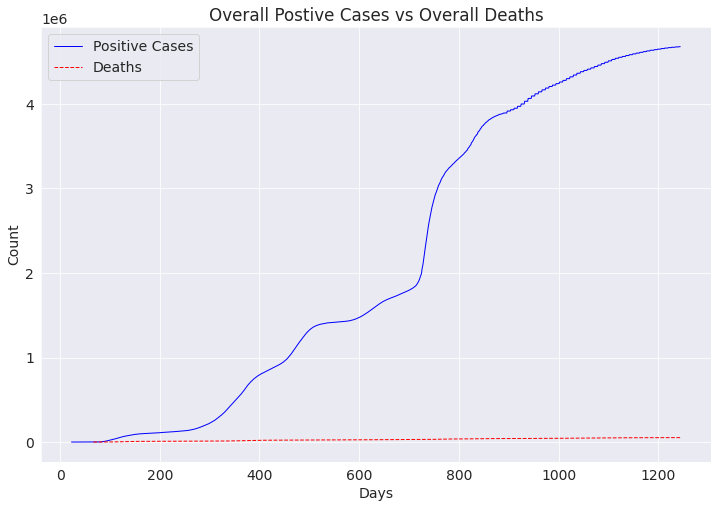

In [50]:
plt.plot(covid_canada_df.total_cases, 'b-', linewidth=1, markersize=5, markeredgewidth=2, markeredgecolor='navy')
plt.plot(covid_canada_df.total_deaths, 'r--', linewidth=1, markersize=5,)
plt.title('Overall Postive Cases vs Overall Deaths')
plt.legend(['Positive Cases', 'Deaths'])
plt.xlabel('Days'); plt.ylabel('Count');

### References and Future Work
There is a wealth of information to be discovered using the COVID-19 dataset, and we have barely scratched the surface. Here are some ideas for further exploration:

Repeat the analysis for different country and compare the results with the ones from Canada

Prepare an analysis based on world region or neighbor countries, e.g. Canada, USA, Mexico

Compare how the data from different countries reflects how the local governments have responded to the pandemic

### References:

Our World in Data - COVID-19 Dataset: https://ourworldindata.org/coronavirus

Government of Canada - Coronavirus disease (COVID-19): Outbreak update: https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html

Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html

Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

In [51]:
import jovian

In [55]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hurrerahchamp57/zerotopandas-course-project-starter-569a2" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/hurrerahchamp57/zerotopandas-course-project-starter-569a2


'https://jovian.com/hurrerahchamp57/zerotopandas-course-project-starter-569a2'

In [53]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "hurrerahchamp57/zerotopandas-course-project-starter-569a2" on https://jovian.com


ApiError: File upload failed: (HTTP 400) Uploaded notebook file seems to be corrupt.